In [1]:
import pandas as pd
# 导入随机函数shuffle，用来打散数据
from random import shuffle

In [3]:
# 数据信息
datafile = 'E:\\NLP\\Python数据分析与挖掘实战\\chapter6\\demo\\data\\model.xls'
# 读取数据（前三列特征，第四列是标签）
data = pd.read_excel(datafile)
# 将表格转换为矩阵
data = data.as_matrix()
print(data)
print('\n')
# 随机打乱数据
shuffle(data)
print(type(data))

[[4 1 1 1]
 [4 0 4 1]
 [2 1 1 1]
 ..., 
 [5 1 2 1]
 [2 1 0 0]
 [4 1 0 0]]


<class 'numpy.ndarray'>


## 数据划分
>### 随机选取20%作为测试集，剩下的80%作为训练集

In [4]:
# 设置训练数据比例
p = 0.8
# 前 80% 为训练集
train = data[:int(len(data) * p), :]
# 后 20% 为测试集
test = data[int(len(data) * p):, :]

## LM神经网络
> 使用Keras库，p_158

In [6]:
# 导入神经网络初始化函数
from keras.models import Sequential
# 导入神经网络层函数，激活函数
from keras.layers.core import Dense, Activation

In [7]:
# 构建的神经网络模型储存路径
netfile = './tmp/net.model'

In [12]:
# 建立神经网络
net = Sequential()
# 添加输入层(3节点)到隐藏层(10节点)的连接
net.add(Dense(input_dim = 3, units = 10))
# 隐藏层用 relu函数 作为激活函数，可以大幅提高准确度（p_96）
net.add(Activation('relu'))
# 添加隐藏层(10节点)到输入层(1节点)的连接
net.add(Dense(input_dim = 10, units = 1))
# 输出层使用 sigmoid函数 作为激活函数 -> p_96 非线性转移函数
'''
它能够把输入的连续实值“压缩”到0和1之间。特别的，如果是非常大的负数，那么输出就是0；如果是非常大的正数，输出就是1. 
sigmoid 函数曾经被使用的很多，不过近年来，用它的人越来越少了。主要是因为它的一些 缺点：

当输入非常大或者非常小的时候，这些神经元的梯度是接近于0的，从图中可以看出梯度的趋势。
Sigmoid 的 输出不是0均值，这会导致后一层的神经元将得到上一层输出的非0均值的信号作为输入
'''
net.add(Activation('sigmoid'))
# 编译模型，因为是二元分类，所以指定损失函数为 binary_crossentropy
# 其他常见的损失函数还有 mean_squared_error, categorical_crossentropy等
# 求解方法（迭代优化）指定 adam，其他的还有 sgd(随机梯度下降法)， rmsprop等
'''
Adam 算法和传统的随机梯度下降不同。随机梯度下降保持单一的学习率（即 alpha）更新所有的权重，学习率在训练过程中并不会改变。
而 Adam 通过计算梯度的一阶矩估计和二阶矩估计而为不同的参数设计独立的自适应性学习率
'''
# http://www.sohu.com/a/156495506_465975
net.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [13]:
# 训练模型，学习1000次, 批次为 1 (1/232)
# 取 3 列数据，取下标为 3 那一列数据
net.fit(train[:, :3], train[:, 3], epochs = 1000, batch_size = 1)
# 保存模型
net.save_weights(netfile)

C:\Users\Just Do It\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
232/232 [==============================] - 2s 8ms/step - loss: 0.9142
Epoch 2/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6846
Epoch 3/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.6112
Epoch 4/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5656
Epoch 5/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.5254
Epoch 6/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.4900
Epoch 7/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.4572
Epoch 8/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.4326
Epoch 9/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.4123
Epoch 10/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.3921
Epoch 11/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.3731
Epoch 12/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.3582
E

232/232 [==============================] - 0s 1ms/step - loss: 0.1961
Epoch 99/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1951
Epoch 100/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1930
Epoch 101/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1952
Epoch 102/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1939
Epoch 103/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1941
Epoch 104/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1936
Epoch 105/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1958
Epoch 106/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1953
Epoch 107/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1930
Epoch 108/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1932
Epoch 109/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1

232/232 [==============================] - 0s 1ms/step - loss: 0.1901
Epoch 195/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1878
Epoch 196/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1907
Epoch 197/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1895
Epoch 198/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1902
Epoch 199/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1870
Epoch 200/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1886
Epoch 201/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1882
Epoch 202/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1885
Epoch 203/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1869
Epoch 204/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1885
Epoch 205/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.1862
Epoch 291/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1878
Epoch 292/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1888
Epoch 293/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1856
Epoch 294/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1864
Epoch 295/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1865
Epoch 296/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1852
Epoch 297/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1882
Epoch 298/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1874
Epoch 299/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1862
Epoch 300/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1870
Epoch 301/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.1798
Epoch 387/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1819
Epoch 388/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 389/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 390/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 391/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1813
Epoch 392/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1789
Epoch 393/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1796
Epoch 394/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1789
Epoch 395/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1826
Epoch 396/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1814
Epoch 397/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.1814
Epoch 483/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1774
Epoch 484/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 485/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 486/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1803
Epoch 487/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 488/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1783
Epoch 489/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1799
Epoch 490/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1767
Epoch 491/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1792
Epoch 492/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1792
Epoch 493/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.1791
Epoch 578/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1774
Epoch 579/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 580/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1802
Epoch 581/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1793
Epoch 582/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 583/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1798
Epoch 584/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1770
Epoch 585/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1798
Epoch 586/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1755
Epoch 587/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1781
Epoch 588/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.1768
Epoch 674/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1749
Epoch 675/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1736
Epoch 676/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 677/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1760
Epoch 678/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1783
Epoch 679/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1778
Epoch 680/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1774
Epoch 681/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1773
Epoch 682/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1732
Epoch 683/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1783
Epoch 684/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.1764
Epoch 770/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1731
Epoch 771/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1761
Epoch 772/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1829
Epoch 773/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1762
Epoch 774/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 775/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1754
Epoch 776/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1769
Epoch 777/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1750
Epoch 778/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1762
Epoch 779/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1751
Epoch 780/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.1707
Epoch 866/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1692
Epoch 867/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1693
Epoch 868/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1702
Epoch 869/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1719
Epoch 870/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1696
Epoch 871/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1706
Epoch 872/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1711
Epoch 873/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1758
Epoch 874/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1728
Epoch 875/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1723
Epoch 876/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

232/232 [==============================] - 0s 1ms/step - loss: 0.1682
Epoch 962/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1673
Epoch 963/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1673
Epoch 964/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1653
Epoch 965/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1647
Epoch 966/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1680
Epoch 967/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1669
Epoch 968/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1649
Epoch 969/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1767
Epoch 970/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 971/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.1654
Epoch 972/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.

OSError: Unable to create file (Unable to open file: name = './tmp/net.model', errno = 2, error message = 'no such file or directory', flags = 13, o_flags = 302)

In [15]:
# 预测结果变形
'''
Keras 用 predict 给出预测概率，predict_classes 才是给出预测类别，而且两者的预测结果都是 n * 1 维数组，而不是通常的 1 * n
'''
print(net.predict_classes(train[:, :3]))
predict_result = net.predict_classes(train[:, :3]).reshape(len(train))
print('\n')
print(predict_result)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]


### 利用训练样本构建LM神经网络的混淆矩阵

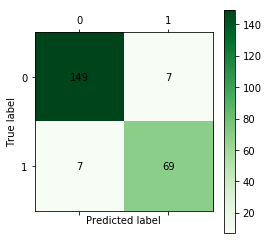

In [16]:
# 导入事先搞好的混淆矩阵
from cm_plot import *
# 显示混淆矩阵可视化结果
# 真实值和预测值作为参数
cm_plot(train[:, 3], predict_result).show()

## CART 决策树

In [17]:
# 导入决策树模型
from sklearn.tree import DecisionTreeClassifier
# 模型输出
treefile = './tree.pkl'
# 建立决策树模型
tree = DecisionTreeClassifier()
# 训练 -> 数据，标签(结果)
tree.fit(train[:, :3], train[:, 3])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
# 保存模型
from sklearn.externals import joblib
joblib.dump(tree, treefile)

['./tree.pkl']

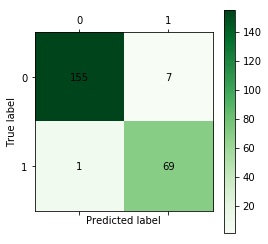

In [19]:
# 导入事先搞好的混淆矩阵
from cm_plot import *
# 显示混淆矩阵可视化结果
# 真实值和预测值作为参数
# Scikit-Learn使用predict方法直接给出预测结果
cm_plot(train[:, 3], tree.predict(train[:, :3])).show()
# p_159

### 使用ROC曲线对LM神经网络和CART决策树进行评价

In [ ]:
# 导入ROC曲线函数